In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('dataset.csv', index_col=0)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 241.9+ KB


In [34]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [35]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [36]:
df = df.set_index('timestamp')

In [37]:
df

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820
...,...
2015-01-31 21:30:00,24670
2015-01-31 22:00:00,25721
2015-01-31 22:30:00,27309


In [38]:
df.isna().sum()

value    0
dtype: int64

<Axes: xlabel='timestamp'>

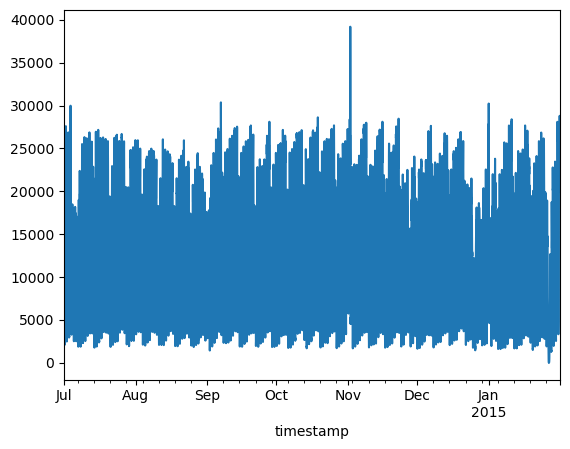

In [39]:
df['value'].plot()

In [40]:
df_day = df.resample("D").mean()

<Axes: xlabel='timestamp'>

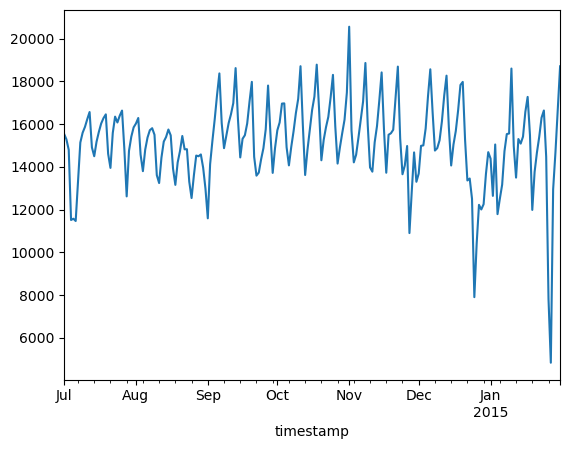

In [41]:
df_day['value'].plot()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10320 entries, 2014-07-01 00:00:00 to 2015-01-31 23:30:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   10320 non-null  int64
dtypes: int64(1)
memory usage: 161.2 KB


In [52]:
df['hour'] = df.index.hour


In [65]:
df_hourly_mean = df.groupby('hour')['value'].median()

<Axes: xlabel='hour'>

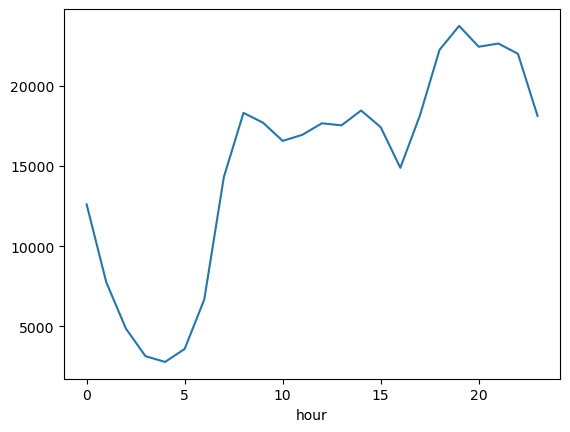

In [66]:
df_hourly_mean.plot()

In [58]:
df['WeekDay'] = df.index.weekday

In [59]:
df

,value,hour,WeekDay
timestamp,,,
2014-07-01 00:00:00,10844,0,1
2014-07-01 00:30:00,8127,0,1
2014-07-01 01:00:00,6210,1,1
2014-07-01 01:30:00,4656,1,1
2014-07-01 02:00:00,3820,2,1
...,...,...,...
2015-01-31 21:30:00,24670,21,5
2015-01-31 22:00:00,25721,22,5
2015-01-31 22:30:00,27309,22,5


<Axes: xlabel='WeekDay'>

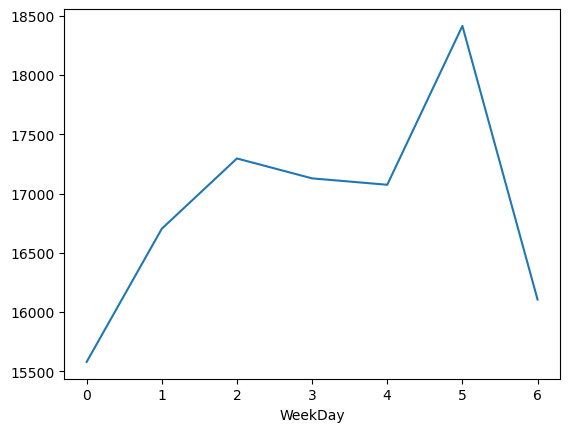

In [64]:
df.groupby('WeekDay')['value'].median().plot()

<Axes: xlabel='Day'>

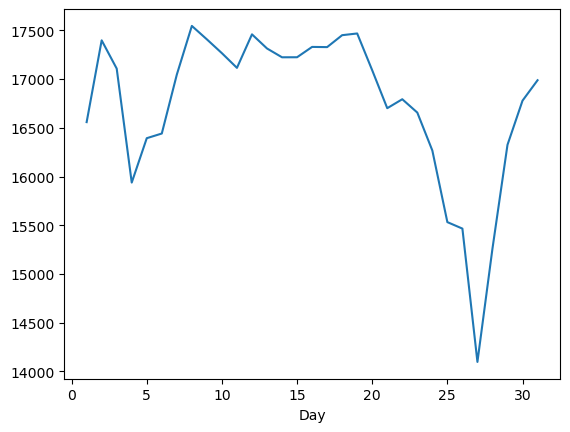

In [62]:
df['Day'] = df.index.day
df.groupby('Day')['value'].median().plot()

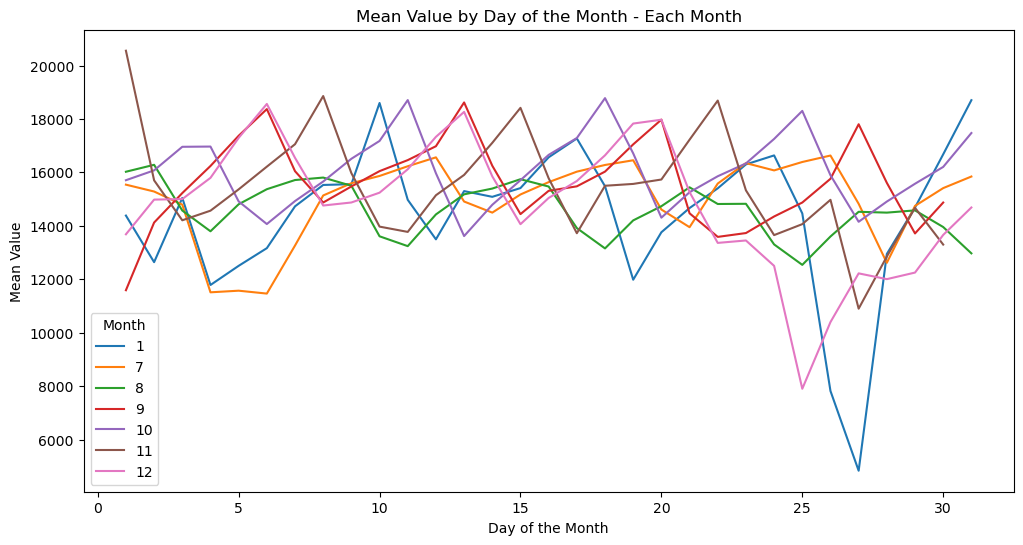

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df['day'] = df.index.day
df['month'] = df.index.month

# Group by month and day, and calculate the mean of the 'value' column
df_grouped = df.groupby(['month', 'day'])['value'].mean()

# Reshape the data to have month as columns and day as rows
df_pivot = df_grouped.unstack(level='month')

# Plot each month in one plot
df_pivot.plot(figsize=(12, 6))

# Set the x-axis label and title
plt.xlabel('Day of the Month')
plt.ylabel('Mean Value')
plt.title('Mean Value by Day of the Month - Each Month')

# Show the legend
plt.legend(title='Month')

# Display the plot
plt.show()


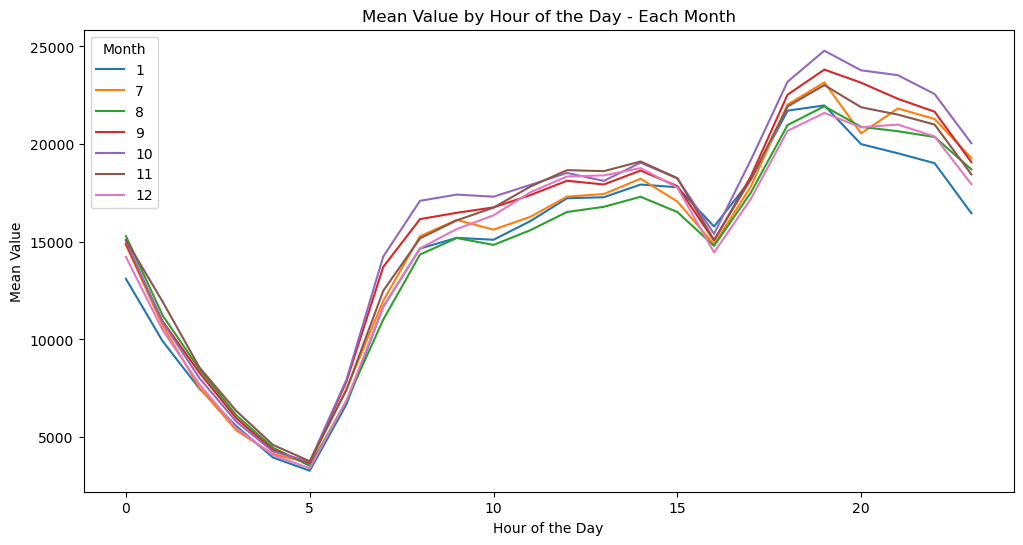

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df['hour'] = df.index.hour
df['month'] = df.index.month

# Group by month and hour, and calculate the mean of the 'value' column
df_grouped = df.groupby(['month', 'hour'])['value'].mean()

# Reshape the data to have month as columns and hour as rows
df_pivot = df_grouped.unstack(level='month')

# Plot each month in one plot
df_pivot.plot(figsize=(12, 6))

# Set the x-axis label and title
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Value')
plt.title('Mean Value by Hour of the Day - Each Month')

# Show the legend
plt.legend(title='Month')

# Display the plot
plt.show()


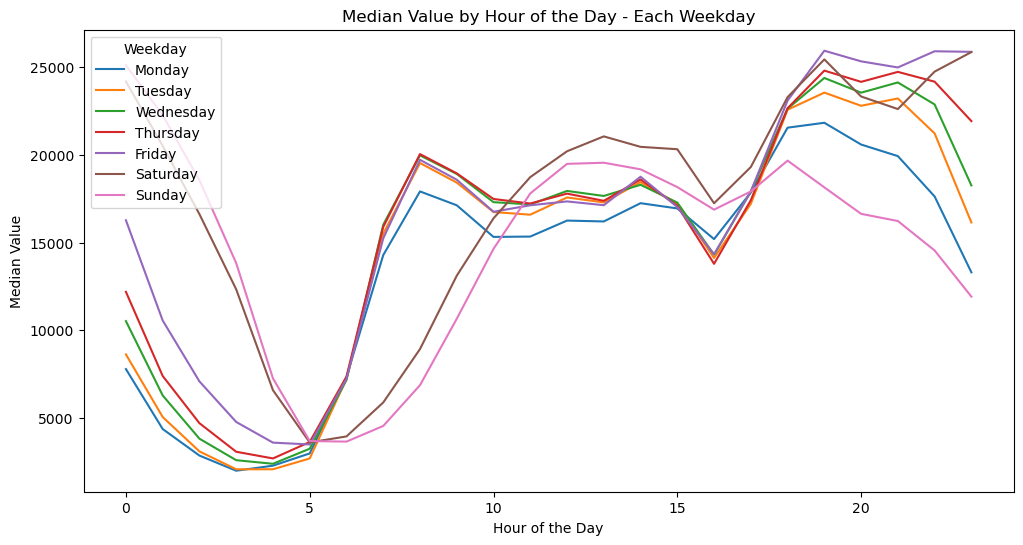

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday

# Group by weekday and hour, and calculate the median of the 'value' column
df_grouped = df.groupby(['weekday', 'hour'])['value'].median()

# Reshape the data to have weekday as columns and hour as rows
df_pivot = df_grouped.unstack(level='weekday')

# Define the weekday names
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot each weekday in one plot
df_pivot.plot(figsize=(12, 6))

# Set the x-axis label and title
plt.xlabel('Hour of the Day')
plt.ylabel('Median Value')
plt.title('Median Value by Hour of the Day - Each Weekday')

# Show the legend
plt.legend(title='Weekday', labels=weekday_names, loc='upper left')

# Display the plot
plt.show()
